# Respuestas parte Teorica

## Diagramas de polos y ceros
    
    El primer diagrama es IIR ya que sus polos no se encuentran en 0,0 y son simetricos.
    El segundo diagrama es FIR (promediador) ya que sus dos polos caen en 0,0.

    Ambos tienen sus polos dentro de la circunferencia unitaria y las regiones de 
    convergencia contienen al circulo unitario, con lo cual serian estables.

## Conceptos de resolucion espectral y temporal
### Como optimizar la resolucion espectral

    Siendo N (cantidad de samples) constante y la relacion que existe entre resolucion espectral y 
    temporal es inversamente proporcional, siempre se aumentara una en detrimento de la otra.
    
    Para mejorar la resolucion espectral es necesario aumentar el tiempo de sampling (Ts) bajando la
    frecuencia de sampling (Ts = 1/Fs), lo que efectivamente reduce la resolucion temporal.
    
## Diferencias entre filtros FIR e IIR
### Retardo de grupo

    En los filtros FIR el retardo de grupo es constante y varia segun el orden del sistema o
    "los elementos de memoria" en un esquema de bloques.
    
    Como los filtros IIR tienen una retroalimentacion del valor de salida, el retardo de grupo
    no es constante, generando una distorsion.

### Estabilidad

    FIR es estable siempre que los ceros contengan a la circunferencia unitaria. Facil de determinar.
    Para conocer si IIR es estable, siempre es necesario analizar sus polos. Son potencialmente inestables.
    
### Costo computacional

    A similar resultado, el orden de un filtro FIR puede ser sensiblemente mayor a uno IIR, lo cual
    impacta en el costo computacional (mayor orden, mayor costo). Sin embargo, los IIR tienen
    la desventaja de retardo de grupo y estabilidad mencionados.
    
### Sencillez de implementacion

    Los filtros FIR serian un caso especial de los filtros IIR y como tal es mas simple de implementar.

# PdS - Examen

En el archivo TRIBICsignal.csv, se adquirió mediante un conversor AD la señal de un detector de iones.

El detector tiene un nivel de base, el cual Cuando una partícula ionizada impacta sobre el detector, se inducen cargas que generan un incremento de la señal, con una forma similar a la de una exponencial negativa. Sobre la misma, siempre existe ruido generado por componentes de alta frecuencia que no aportan información.

Las condiciones del muestreo son:

    Fs=10MHz
    N=512
    
Para trabajar con las muestras en Python, a continuación se obtienen las muestras de la señal y se representa la misma en un gráfico.

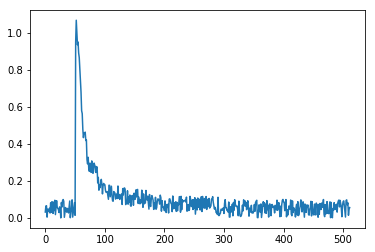

In [10]:
import numpy as np
import matplotlib.pyplot as plt

signal = np.genfromtxt('TRIBICsignal.csv',delimiter=",")

plt.figure
plt.plot(signal)
plt.show()

# Análisis de señal

1) Obtener el espectro de la señal muestreada.  

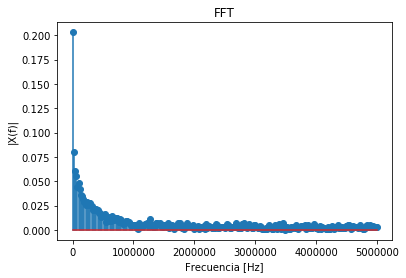

In [2]:
import scipy.fftpack
import scipy.signal

Fs      = 10000000
N       = 512
f       = np.linspace (0.0, Fs / 2, N // 2)
FFTabsN = (2 / N) * np.abs (scipy.fftpack.fft (signal))
FFTabsH = FFTabsN[:N // 2]

plt.title  ('FFT')
plt.xlabel ('Frecuencia [Hz]')
plt.ylabel ('|X(f)|')
plt.stem   (f, FFTabsH)
plt.show   ()

2) Calcular la energía de su espectro.

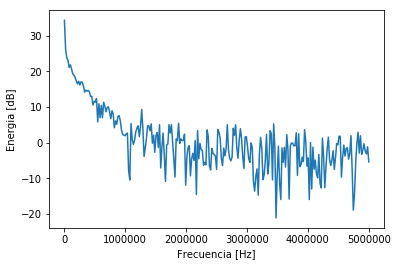

In [3]:
p = 20 * np.log10 (np.abs (np.fft.rfft(signal)))
#p = (np.abs (np.fft.rfft(signal)))
f = np.linspace (0, Fs // 2, len(p))
plt.xlabel ('Frecuencia [Hz]')
plt.ylabel ('Energia [dB]')
plt.plot (f, p)
plt.show ()

3) En base a los puntos 1) y 2), estime el ancho de banda de señal explicando el criterio empleado.

#### Estimo un ancho de banda de 1 Mhz ya que, como puede verse en el grafico, aproximadamente a esa frecuencia la energia cae por debajo de 3 dB, por ende asumo que es ruido.

# Filtrado de ruido

4) En los archivos filter_a.csv, filter_b.csv y filter_c.csv se encuentran almacenados los coeficientes correspondientes a las respectivas h[n] de tres filtros tipo FIR.

* Obtenga la respuesta de módulo y especifique de qué tipo de filtro se trata (pasabajos, pasaaltos, pasabanda, etc)

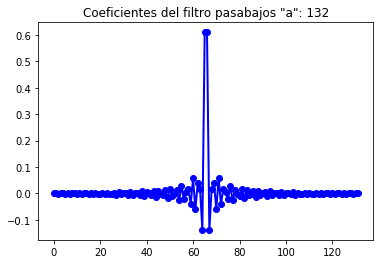

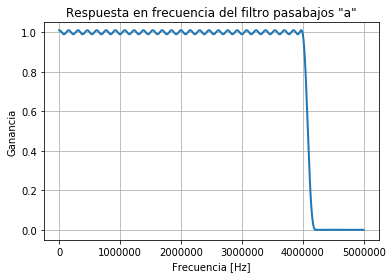

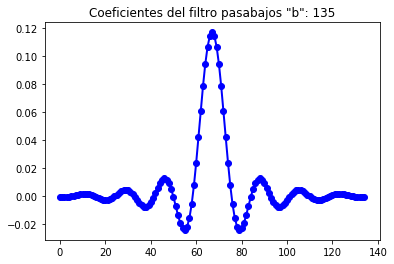

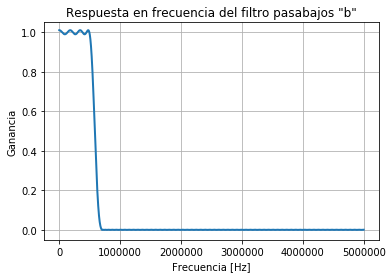

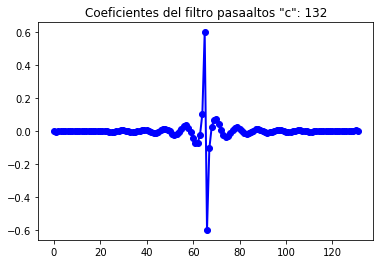

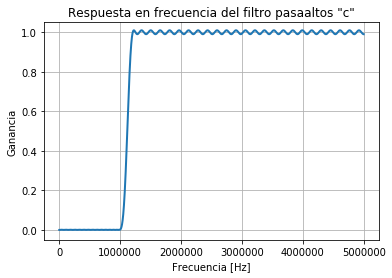

In [4]:
filter_name  = ['a', 'b', 'c']
filter_coeff = [ [],  [],  []]
filter_type  = ['pasabajos', 'pasabajos', 'pasaaltos']

for i in range(len(filter_name)):
    filter_coeff[i] = np.genfromtxt ('filter_' + filter_name[i] + '.csv')

    plt.plot  (filter_coeff[i], 'bo-', linewidth=2)
    plt.title ('Coeficientes del filtro ' + filter_type[i] + ' "' + filter_name[i] + '": ' + str(len(filter_coeff[i])))
    plt.show  ()

    w, h = scipy.signal.freqz (filter_coeff[i], worN=8000)
    plt.plot   ((w / np.pi) * (Fs / 2), np.absolute(h), linewidth=2)
    plt.title  ('Respuesta en frecuencia del filtro ' + filter_type[i] + ' "' + filter_name[i] + '"')
    plt.xlabel ('Frecuencia [Hz]')
    plt.ylabel ('Ganancia')
    plt.ylim   (-0.05, 1.05)
    plt.grid   (True)
    plt.show   ()

* En función de las respuestas obtenidas en a), decida cuál de ellos es más adecuada para eliminar el ruido de alta frecuencia de la señal observada en el punto 1)

#### Siendo coherente con mi conclusion en el punto 3), elijo el filtro pasabajos denominado "b".

5) Filtre la señal de entrada con el filtro elegido, y grafique el nuevo espectro obtenido.

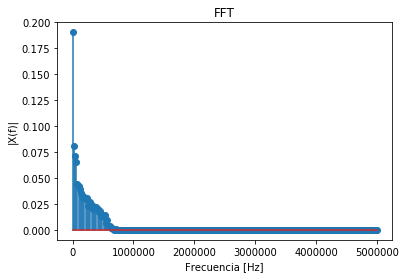

In [5]:
signal_bfilt = scipy.signal.lfilter (filter_coeff[1], 1.0, signal)

f       = np.linspace (0.0, Fs / 2, N // 2)
FFTabsN = (2 / N) * np.abs (scipy.fftpack.fft (signal_bfilt))
FFTabsH = FFTabsN[:N // 2]

plt.title  ('FFT')
plt.xlabel ('Frecuencia [Hz]')
plt.ylabel ('|X(f)|')
plt.stem   (f, FFTabsH)
plt.show   ()

Compare con el espectro obtenido en 1).

#### El contenido de la señal ha sido filtrado en las frecuencias deseadas. La señal filtrada puede apreciarse en el siguiente grafico.

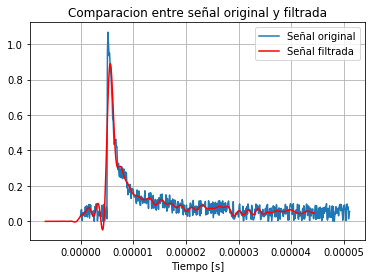

In [19]:
# tiempo de muestreo
Ts = 1 / Fs   

#Genero el espacio para poder tener el espacio temporal que va de 0 a N-1
#Flatten convierte a un array de 1 dimensión.
# t = np.linspace (0, (N-1) * Ts, N).flatten ()
t = np.arange(N) / Fs

# Demora de grupo de la señal filtrada
delay = 0.5 * (len(filter_coeff[1])-1) / Fs

# Senal original.
plt.plot (t, signal)

# Plot the filtered signal, shifted to compensate for the phase delay.
plt.plot (t-delay, signal_bfilt, 'r-')

# Plot just the "good" part of the filtered signal.  The first N-1
# samples are "corrupted" by the initial conditions.
# plt.plot (t[N-1:]-delay, signal_bfilt[N-1:], 'g', linewidth=4)

plt.title  ('Comparacion entre señal original y filtrada')
plt.xlabel ('Tiempo [s]')
plt.grid   (True)
plt.legend (('Señal original',
            'Señal filtrada'),
            loc='best')
plt.show   ()

# Detección de eventos

6) En función de la representación temporal de la señal, proponga un método de detección que permita encontrar el inicio del pulso visualizado, empleando un filtro sencillo.

7) Aplíquelo sobre la señal 